# Constituencywise Assembly Election Results of Kerala in 2021 

In [1]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Data Extraction

In [2]:
df = pd.read_csv('../input/assembly-election-results-kerala-2021/Assemby Constituency_Kerala_2021.csv')

In [3]:
df.shape

(140, 11)

In [4]:
df.head()

,AC Name,AC No.,Type,District,Winning Candidate,Party,Total Electors,Total Votes,Poll%,Margin,Margin %
0,Adoor,115,SC,Pathanamthitta,Chittayam Gopakumar,Communist Party Of India,204205,154817,75.8,2919,1.9
1,Alappuzha,104,GEN,Alappuzha,P.P Chitharanjan,Communist Party Of India (Marxist),194187,157357,81.0,11644,7.4
2,Alathur,60,GEN,Palakkad,K.D.Prasenan,Communist Party Of India (Marxist),164415,134583,81.9,34118,25.4
3,Aluva,76,GEN,Ernakulam,Anwar Sadath,Indian National Congress,182360,149489,82.0,18886,12.6
4,Ambalapuzha,105,GEN,Alappuzha,H.Salam,Communist Party Of India (Marxist),171291,136430,79.6,11125,8.2


In [5]:
df.describe()

,AC No.,Total Electors,Total Votes,Poll%,Margin,Margin %
count,140.0000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,70.5000,187176.157143,148115.042857,79.135714,15934.085714,10.808571
std,40.5586,15405.646932,14764.904159,4.551434,11948.138975,8.079537
min,1.0000,149439.000000,109386.000000,66.100000,38.000000,0.000000
25%,35.7500,175896.500000,137070.750000,76.000000,6157.750000,4.275000
50%,70.5000,188683.500000,149304.500000,79.250000,14048.000000,9.450000
75%,105.2500,197409.000000,157692.500000,82.425000,23356.000000,15.925000
max,140.0000,228468.000000,192958.000000,89.300000,60963.000000,39.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AC Name            140 non-null    object 
 1   AC No.             140 non-null    int64  
 2   Type               140 non-null    object 
 3   District           140 non-null    object 
 4   Winning Candidate  140 non-null    object 
 5   Party              140 non-null    object 
 6   Total Electors     140 non-null    int64  
 7   Total Votes        140 non-null    int64  
 8   Poll%              140 non-null    float64
 9   Margin             140 non-null    int64  
 10  Margin %           140 non-null    float64
dtypes: float64(2), int64(4), object(5)
memory usage: 12.2+ KB


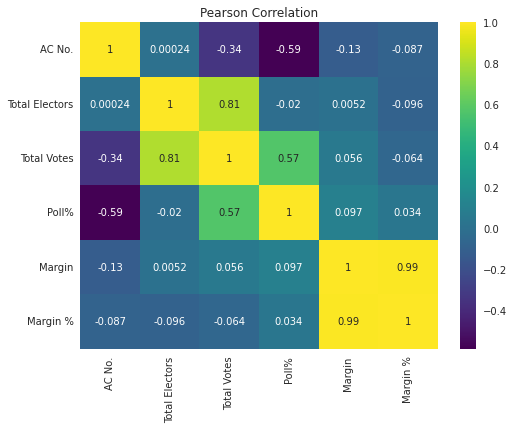

In [7]:
#heatmap correlation 
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')
plt.title("Pearson Correlation")
plt.show()

# Visualization

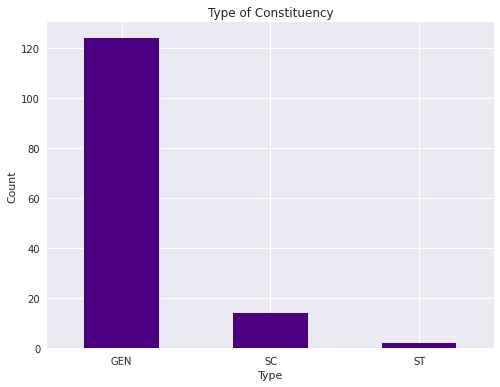

In [8]:
#visualize type of constituenccy
plt.figure(figsize = (8,6))
chart = df['Type'].value_counts().sort_values(ascending = False).plot(kind = 'bar', color = 'indigo')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 1)
plt.title("Type of Constituency")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

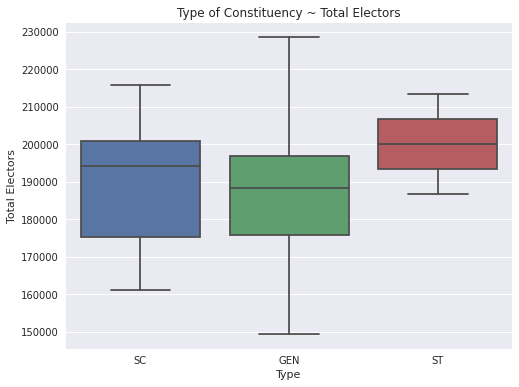

In [9]:
#visualize type of constituency ~ total electors
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'Type', y = 'Total Electors')
plt.title("Type of Constituency ~ Total Electors")
plt.xlabel("Type")
plt.ylabel("Total Electors")
plt.show()

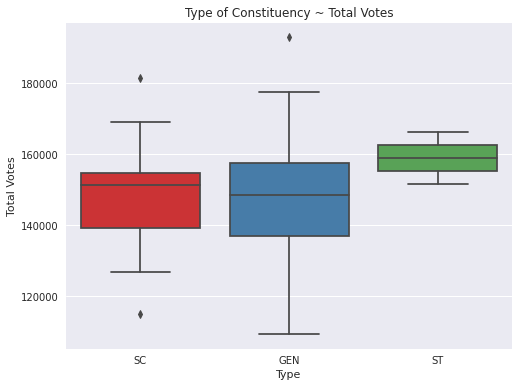

In [10]:
#visualize type of constituency ~ total votes
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'Type', y = 'Total Votes', palette = 'Set1')
plt.title("Type of Constituency ~ Total Votes")
plt.xlabel("Type")
plt.ylabel("Total Votes")
plt.show()

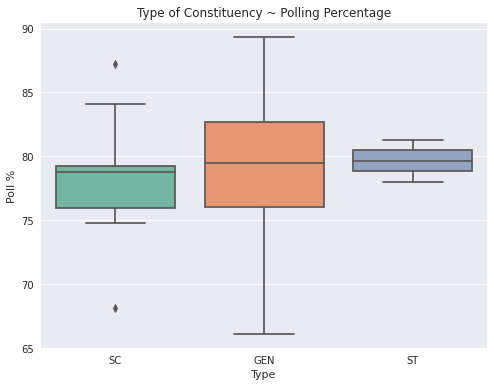

In [11]:
#visualize type of constituency ~ polling percentage
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'Type', y = 'Poll%', palette = 'Set2')
plt.title("Type of Constituency ~ Polling Percentage")
plt.xlabel("Type")
plt.ylabel("Poll %")
plt.show()

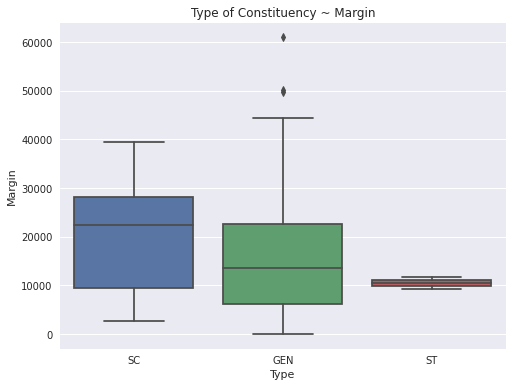

In [12]:
#visualize type of constituency ~ margin
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'Type', y = 'Margin')
plt.title("Type of Constituency ~ Margin")
plt.xlabel("Type")
plt.ylabel("Margin")
plt.show()

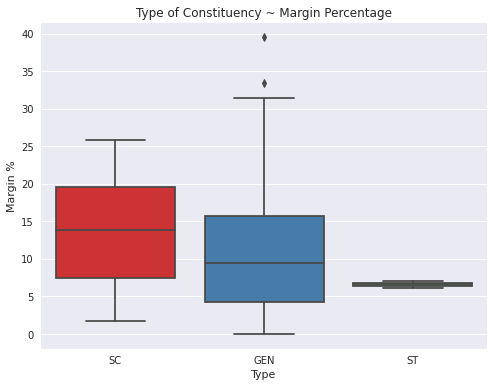

In [13]:
#visualize type of constituency ~ margin percentage
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'Type', y = 'Margin %', palette = 'Set1')
plt.title("Type of Constituency ~ Margin Percentage")
plt.xlabel("Type")
plt.ylabel("Margin %")
plt.show()

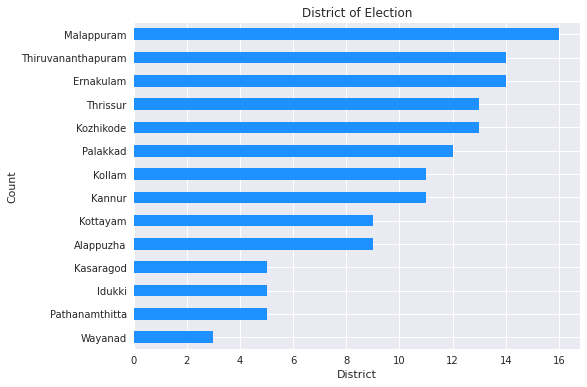

In [14]:
#visualize district of election
plt.figure(figsize = (8,6))
df['District'].value_counts().sort_values().plot(kind = 'barh', color = 'dodgerblue')
plt.title("District of Election")
plt.xlabel("District")
plt.ylabel("Count")
plt.show()

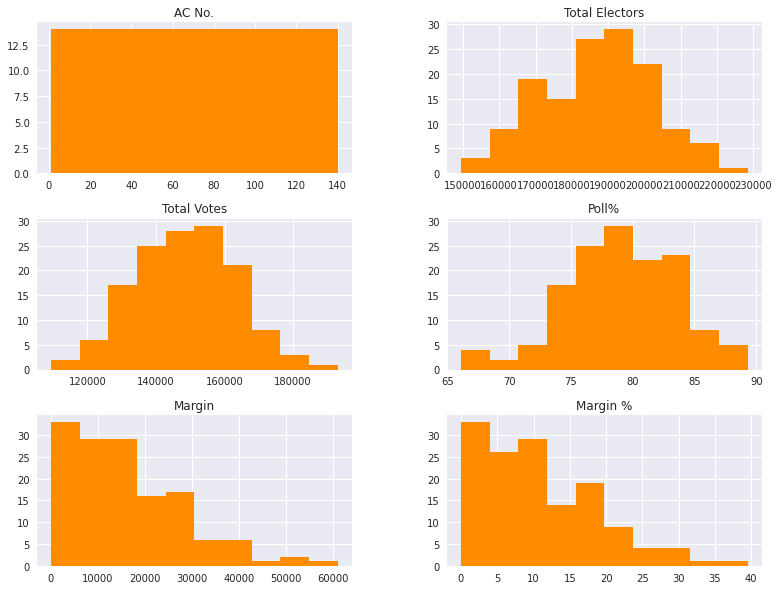

In [15]:
#visualize histogram of each attribute
df.hist(figsize = (13,10), color = 'darkorange')
plt.show()

# Linear Regression Model

In [16]:
#handling categorical data
df = pd.get_dummies(df, drop_first = True)
df.head()

,AC No.,Total Electors,Total Votes,Poll%,Margin,Margin %,AC Name_Alappuzha,AC Name_Alathur,AC Name_Aluva,AC Name_Ambalapuzha,...,Party_Janadhipathiya Kerala Congress,Party_Janata Dal (Secular),Party_Kerala Congress,Party_Kerala Congress (B),Party_Kerala Congress (Jacob),Party_Kerala Congress(M),Party_Loktantrik Janta Dal,Party_National Secular Conference,Party_Nationalist Congress Party,Party_Revolutionary Marxist Party Of India
0,115,204205,154817,75.8,2919,1.9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,104,194187,157357,81.0,11644,7.4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60,164415,134583,81.9,34118,25.4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,76,182360,149489,82.0,18886,12.6,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,105,171291,136430,79.6,11125,8.2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#split data
X = df.drop('Total Votes', axis = 1)
y = df['Total Votes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(98, 313)
(98,)
(42, 313)
(42,)


In [18]:
#build model
lr = LinearRegression()
%time lr.fit(X_train, y_train)

CPU times: user 24.3 ms, sys: 21.3 ms, total: 45.5 ms
Wall time: 28.7 ms


LinearRegression()

In [19]:
#prediction
y_pred = lr.predict(X_test)
print(y_pred)

[144546.58892917 159253.76582288 163418.46510258 152258.51041923
 163025.37202721 143285.49985504 127242.33314553 129946.62330936
 155305.52861072 144709.5579829  166824.0207782  136085.35398264
 190289.53973638 167304.65184832 128015.34052587 126687.54068623
 139794.21055559 151089.93667909 152269.9531308  141747.66936144
 138155.20450689 151233.85319708 156667.80541474 159713.18552713
 135111.92130778 128828.8123549  124961.46680817 160811.78056405
 152534.80372066 145214.41240507 159560.69752872 171454.43985363
 126939.39051666 127493.75125799 131475.49699192 152209.29660867
 137346.48540509 154933.31125541 160117.76535302 154134.7962877
 144490.10029536 146157.22695469]


In [20]:
#check MAE, MSE, RMSE & R-Squared
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_pred).round(2))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred).round(2))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_absolute_error(y_test, y_pred).round(2)))
print('R-Squared : ', metrics.r2_score(y_test, y_pred))

Mean Absolute Error :  489.28
Mean Squared Error :  474071.93
Root Mean Squared Error :  22.119674500317583
R-Squared :  0.9977945743573953


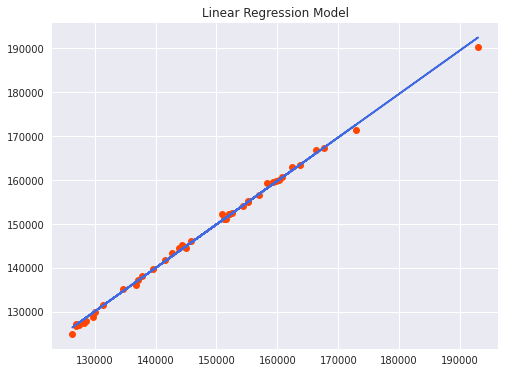

In [21]:
#visualize model
x = y_test
y = y_pred

plt.figure(figsize = (8,6))
plt.title("Linear Regression Model")
plt.plot(x, y, 'o', color = 'orangered')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'royalblue')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


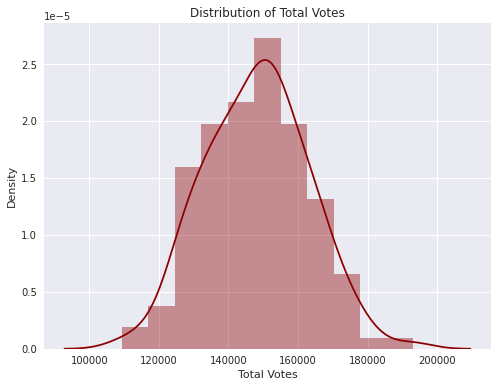

In [22]:
#distribution
plt.figure(figsize = (8,6))
sns.distplot(df['Total Votes'], color = 'darkred')
plt.title("Distribution of Total Votes")
plt.show()

# Check Feature Importance 

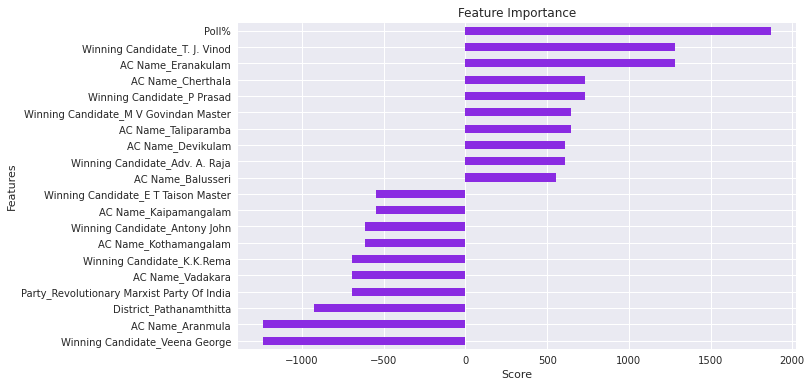

In [23]:
#defining feature
coef = pd.Series(lr.coef_, index = X.columns)

imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

#visualize feature
plt.figure(figsize = (10,6))
imp_coef.plot(kind = 'barh', color = 'blueviolet')
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()